<a href="https://colab.research.google.com/github/ac746g/YSSF934/blob/main/Copy_of_Copy_of_Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The following notebook is an analysis of the scheduling strategy of the National Hockey League. I dive into the 2021-2022 season data to understand was scheduling factors lead to increased attendance. I will look at visualizations analzying how day of the week, month, population lead to changes in ticket sales. From 2010 - 2019 ticket sales have steadily decreased as a percentage of National Hockey League revenue. It is vital that these scheduling strategies be analyzed in order to maintain or increase the revenue generated by tickets because this also leads to sales in concessions, merchandise and parking. In addition to sales, this information would be beneficial to the promotions department as they would likely opt to put promotions that push ticket sales, such as a free hat, on days that expected turnout is the lowest to generate greater interest. 

My hypothesis is that weekend days will significantly outsell weekday games. I would also expect there to be not much of a difference between Monday, Tuesday and Wednesday but I would expect Saturday to be much more profitable than Sunday. I would expect that newer arenas would likely have greater attendance because it seems that the fan experience would be greater. For example, more screens to view replays, greater concession options etc. I also looked at how attendance is impacted by the population of the metro area the team plays in. 

In [30]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/finalcapstone.csv')

df.head()







,Date,Visitor,G,Home,G.1,Unnamed: 5,Att.,LOG,Notes,Day of Week,left,country,Arena_Opened,Capactiy,Cat3,Cat2,Population,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2021-10-12,Pittsburgh Penguins,6,Tampa Bay Lightning,2,NaN,"19,092",02:33,NaN,Tuesday,Tam,USA,1996,19092,Medium,Large,3243963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-12,Seattle Kraken,3,Vegas Golden Knights,4,NaN,"18,431",02:25,NaN,Tuesday,Veg,USA,2016,17367,Small,Small,2315963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-13,Winnipeg Jets,1,Anaheim Ducks,4,NaN,"16,260",02:29,NaN,Wednesday,Ana,USA,1993,17174,Medium,Large,3166857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-13,Chicago Blackhawks,2,Colorado Avalanche,4,NaN,"18,037",02:32,NaN,Wednesday,Col,USA,1999,17809,Small,Small,2991231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-13,Vancouver Canucks,2,Edmonton Oilers,3,SO,"16,034",02:42,NaN,Wednesday,Edm,Canada,2016,18347,Small,Small,1321426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://docs.google.com/spreadsheets/d/1K6jj1Y2q1axqVZQ4iFUa1ghelpwGlfIr/edit?usp=sharing&ouid=111810929503228744753&rtpof=true&sd=true

This is the link to the dataset I used for this analysis. The game data came from https://www.hockey-reference.com/leagues/NHL_2022_games.html and the population data is from https://www.census.gov/content/dam/Census/newsroom/stories/nhl-stanley-cup/2021-stanley-cup-playoffs.pdf. 

In [31]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None) 

df.head()



,Date,Visitor,G,Home,G.1,Unnamed: 5,Att.,LOG,Notes,Day of Week,left,country,Arena_Opened,Capactiy,Cat3,Cat2,Population,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2021-10-12,Pittsburgh Penguins,6,Tampa Bay Lightning,2,NaN,"19,092",02:33,NaN,Tuesday,Tam,USA,1996,19092,Medium,Large,3243963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-12,Seattle Kraken,3,Vegas Golden Knights,4,NaN,"18,431",02:25,NaN,Tuesday,Veg,USA,2016,17367,Small,Small,2315963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-13,Winnipeg Jets,1,Anaheim Ducks,4,NaN,"16,260",02:29,NaN,Wednesday,Ana,USA,1993,17174,Medium,Large,3166857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-13,Chicago Blackhawks,2,Colorado Avalanche,4,NaN,"18,037",02:32,NaN,Wednesday,Col,USA,1999,17809,Small,Small,2991231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-13,Vancouver Canucks,2,Edmonton Oilers,3,SO,"16,034",02:42,NaN,Wednesday,Edm,Canada,2016,18347,Small,Small,1321426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1312 non-null   object 
 1   Visitor       1312 non-null   object 
 2   G             1312 non-null   int64  
 3   Home          1312 non-null   object 
 4   G.1           1312 non-null   int64  
 5   Unnamed: 5    288 non-null    object 
 6   Att.          1312 non-null   object 
 7   LOG           1312 non-null   object 
 8   Notes         3 non-null      object 
 9   Day of Week   1312 non-null   object 
 10  left          1312 non-null   object 
 11  country       1312 non-null   object 
 12  Arena_Opened  1312 non-null   int64  
 13  Capactiy      1312 non-null   int64  
 14  Cat3          1312 non-null   object 
 15  Cat2          1312 non-null   object 
 16  Population    1312 non-null   int64  
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [33]:
df.drop(['Unnamed: 5', 'Notes',	'Unnamed: 17',	'Unnamed: 18',	'Unnamed: 19',	'Unnamed: 20',	'Unnamed: 21',	'Unnamed: 22',	'Unnamed: 23',	'Unnamed: 24',	'Unnamed: 25',	'Unnamed: 26',	'Unnamed: 27',	'Unnamed: 28',	'Unnamed: 29',	'Unnamed: 30'], axis=1, inplace=True)
df.head()

,Date,Visitor,G,Home,G.1,Att.,LOG,Day of Week,left,country,Arena_Opened,Capactiy,Cat3,Cat2,Population
0,2021-10-12,Pittsburgh Penguins,6,Tampa Bay Lightning,2,"19,092",02:33,Tuesday,Tam,USA,1996,19092,Medium,Large,3243963
1,2021-10-12,Seattle Kraken,3,Vegas Golden Knights,4,"18,431",02:25,Tuesday,Veg,USA,2016,17367,Small,Small,2315963
2,2021-10-13,Winnipeg Jets,1,Anaheim Ducks,4,"16,260",02:29,Wednesday,Ana,USA,1993,17174,Medium,Large,3166857
3,2021-10-13,Chicago Blackhawks,2,Colorado Avalanche,4,"18,037",02:32,Wednesday,Col,USA,1999,17809,Small,Small,2991231
4,2021-10-13,Vancouver Canucks,2,Edmonton Oilers,3,"16,034",02:42,Wednesday,Edm,Canada,2016,18347,Small,Small,1321426


In [34]:
df['Att.']=df['Att.'].str.replace(',','')

In [35]:
df['Att.'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1312 non-null   object
 1   Visitor       1312 non-null   object
 2   G             1312 non-null   int64 
 3   Home          1312 non-null   object
 4   G.1           1312 non-null   int64 
 5   Att.          1312 non-null   object
 6   LOG           1312 non-null   object
 7   Day of Week   1312 non-null   object
 8   left          1312 non-null   object
 9   country       1312 non-null   object
 10  Arena_Opened  1312 non-null   int64 
 11  Capactiy      1312 non-null   int64 
 12  Cat3          1312 non-null   object
 13  Cat2          1312 non-null   object
 14  Population    1312 non-null   int64 
dtypes: int64(5), object(10)
memory usage: 153.9+ KB


In [36]:
df["Att."] = pd.to_numeric(df["Att."], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1312 non-null   object
 1   Visitor       1312 non-null   object
 2   G             1312 non-null   int64 
 3   Home          1312 non-null   object
 4   G.1           1312 non-null   int64 
 5   Att.          1312 non-null   int64 
 6   LOG           1312 non-null   object
 7   Day of Week   1312 non-null   object
 8   left          1312 non-null   object
 9   country       1312 non-null   object
 10  Arena_Opened  1312 non-null   int64 
 11  Capactiy      1312 non-null   int64 
 12  Cat3          1312 non-null   object
 13  Cat2          1312 non-null   object
 14  Population    1312 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 153.9+ KB


In [37]:
df = df[df["Att."] >= 2]

In [38]:
avgdow = df.groupby('Day of Week')['Att.'].mean()

In [39]:
ravgdow = avgdow.round(0)
print(ravgdow)

Day of Week
Friday       16447.0
Monday       14940.0
Saturday     16667.0
Sunday       16251.0
Thursday     15690.0
Tuesday      15631.0
Wednesday    15505.0
Name: Att., dtype: float64


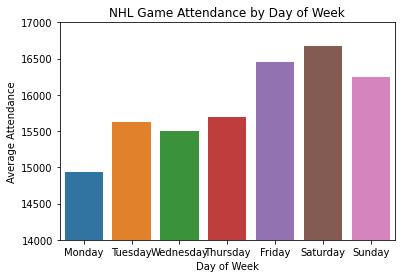

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ravgdow = ravgdow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sns.barplot(x=ravgdow.index, y=ravgdow.values)

plt.xlabel("Day of Week")
plt.ylabel("Average Attendance")
plt.title("NHL Game Attendance by Day of Week")
plt.ylim(14000, 17000)

plt.show()

This first chart breaks down the average attendance for each day of the week. As expected, Friday, Saturday and Sunday have significantly higher attendance. Monday is by far the lowest but as you can see in the t tests below, the difference between the weekdays is not statictically significant. However, the difference between Monday and Friday-Sunday has a very low p value so we can consider this to be statiscally significant. 

Generally, NHL teams have a 1-2 day break in between games to allow for rest and travel. Although it may seem obvious to schedule as many games as possible for Saturdays, I would recommend scheduling games for Friday and Sunday between teams that would not have to travel very far and could play on 1 days rest. For example, Philadelphia would play New Jersey and New York would play Washington on Friday and then on Sunday, Philadelphia could play New York and then New Jersey could play Washington. For the longer road trips, where it would be 2-3 days in between games, it is imporant to make these days off during the week where attendance is the lowest. 

In [41]:
from scipy.stats import ttest_ind


monday_data = df[df['Day of Week'] == 'Monday']['Att.']
tuesday_data = df[df['Day of Week'] == 'Tuesday']['Att.']
wednesday_data = df[df['Day of Week'] == 'Wednesday']['Att.']
thursday_data = df[df['Day of Week'] == 'Thursday']['Att.']
friday_data = df[df['Day of Week'] == 'Friday']['Att.']
saturday_data = df[df['Day of Week'] == 'Saturday']['Att.']
sunday_data = df[df['Day of Week'] == 'Sunday']['Att.']

t_stat, p_value = ttest_ind(monday_data, tuesday_data)
print("Monday vs Tuesday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(monday_data, wednesday_data)
print("Monday vs Wednesday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(monday_data, thursday_data)
print("Monday vs Thursday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(monday_data, friday_data)
print("Monday vs Friday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(monday_data, saturday_data)
print("Monday vs Saturday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(monday_data, sunday_data)
print("Monday vs Sunday: T-Statistic:", t_stat, "P-Value:", p_value)

Monday vs Tuesday: T-Statistic: -1.5377652130834796 P-Value: 0.12501999219064278
Monday vs Wednesday: T-Statistic: -1.1167227857560973 P-Value: 0.2653200517553042
Monday vs Thursday: T-Statistic: -1.6338839648150583 P-Value: 0.10318235779970578
Monday vs Friday: T-Statistic: -3.274806427230469 P-Value: 0.0012093960458017642
Monday vs Saturday: T-Statistic: -3.1841341670690504 P-Value: 0.001572934716516322
Monday vs Sunday: T-Statistic: -2.752288440749227 P-Value: 0.006343042410106578


In [42]:
t_stat, p_value = ttest_ind(saturday_data, monday_data)
print("Saturday vs Monday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(saturday_data, tuesday_data)
print("Saturday vs Tuesday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(saturday_data, wednesday_data)
print("Saturday vs Wednesday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(saturday_data, thursday_data)
print("Saturday vs Thursday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(saturday_data, friday_data)
print("Saturday vs Friday: T-Statistic:", t_stat, "P-Value:", p_value)

t_stat, p_value = ttest_ind(saturday_data, sunday_data)
print("Saturday vs Sunday: T-Statistic:", t_stat, "P-Value:", p_value)

Saturday vs Monday: T-Statistic: 3.1841341670690504 P-Value: 0.001572934716516322
Saturday vs Tuesday: T-Statistic: 2.8127007842339613 P-Value: 0.005097764084413905
Saturday vs Wednesday: T-Statistic: 2.4893913377295793 P-Value: 0.013203719208235315
Saturday vs Thursday: T-Statistic: 2.632744723881208 P-Value: 0.008718810506139657
Saturday vs Friday: T-Statistic: 0.5157270923007644 P-Value: 0.6063151113675732
Saturday vs Sunday: T-Statistic: 0.9782528082075516 P-Value: 0.32849806901996703


In [43]:
df["Day of Week"] = df["Day of Week"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1311
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Date          1302 non-null   object  
 1   Visitor       1302 non-null   object  
 2   G             1302 non-null   int64   
 3   Home          1302 non-null   object  
 4   G.1           1302 non-null   int64   
 5   Att.          1302 non-null   int64   
 6   LOG           1302 non-null   object  
 7   Day of Week   1302 non-null   category
 8   left          1302 non-null   object  
 9   country       1302 non-null   object  
 10  Arena_Opened  1302 non-null   int64   
 11  Capactiy      1302 non-null   int64   
 12  Cat3          1302 non-null   object  
 13  Cat2          1302 non-null   object  
 14  Population    1302 non-null   int64   
dtypes: category(1), int64(6), object(8)
memory usage: 154.2+ KB


In [44]:
games_count = df.groupby("Day of Week").size()
games_count = games_count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(games_count)

Day of Week
Monday       101
Tuesday      247
Wednesday    123
Thursday     251
Friday       147
Saturday     277
Sunday       156
dtype: int64


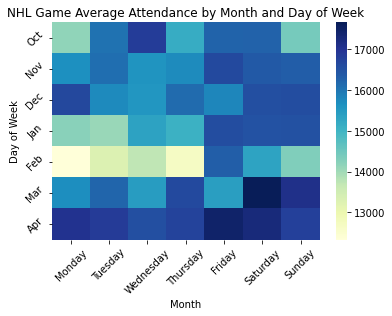

In [45]:
from calendar import month_name

df["Date"] = pd.to_datetime(df["Date"])
df["month"] = df["Date"].dt.month
grouped = df.groupby(["Day of Week", "month"])["Att."].mean()
groupedcount = df.groupby(["Day of Week", "month"])["Att."].count()

groupedcount = groupedcount.reset_index()


df_season = df.query("month in [10,11,12,1,2,3,4]")

pivot_table = grouped.reset_index().pivot_table(values='Att.', index='Day of Week', columns='month')

pivot_table = pivot_table.loc[:, [10,11,12,1,2,3,4]]

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table = pivot_table.reindex(days)

pivot_table = pivot_table.T

heat = sns.heatmap(pivot_table, cmap='YlGnBu')


plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.title("NHL Game Average Attendance by Month and Day of Week")

month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']
heat.set_yticklabels(month_labels, rotation = 90)

plt.xticks(rotation=45)
plt.yticks(rotation=45)


plt.show()



This heat map illustrates how day of the week and month affect attendance. The months are January and February are the weakest which is not surprsing as this is seen in the travel industry as well. April is by far the highest performing month, showing strong turnout during the week as well. My explination for this is that these are the games closest to the playoffs so they are higher leverage games. This can also be explained by weather, it is much more likley that people are willing to travel to these arenas in the Spring vs. the Winter. My recommendation based on this data is to provide more time in between games in January and February. This can be done by cross country trips being completed in those months and the more local trips in the Spring to allow for a more densely packed schedule. 

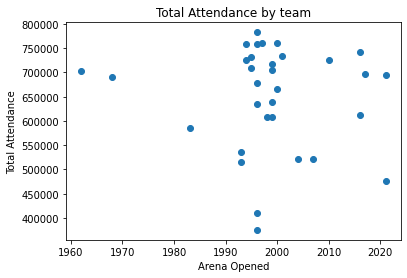

In [46]:
grouped_data1 = df.groupby(['Home'])['Att.'].sum().reset_index()

grouped_data1 = grouped_data1.merge(df[['Home','Arena_Opened']].drop_duplicates(), on='Home')

plt.scatter(grouped_data1['Arena_Opened'], grouped_data1['Att.'])

plt.xlabel('Arena Opened')
plt.ylabel('Total Attendance')
plt.title('Total Attendance by team')

plt.show()

In [48]:
grouped_data1 = grouped_data1.merge(df[['Home','Arena_Opened']].drop_duplicates(), on='Home', how='inner')
correlation, p_value = pearsonr(grouped_data1['Arena_Opened'], grouped_data1['Att.'])
print(correlation)

-0.07751081044953029


This data shows there is effectlively no correlation between what year the arena was built the ticket sales of the team. Building a new arena is a huge finacial endevavor for the owners and the city but this does to be an effective tactic to increase sales. This also shows that having an older arena is no excuse to not draw fans. 

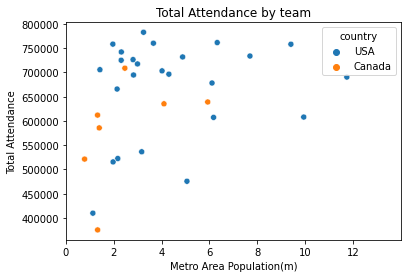

In [49]:
grouped_data2 = df.groupby(['Home', 'country'])['Att.'].sum().reset_index()
grouped_data2 = grouped_data2.merge(df[['Home','Population']].drop_duplicates(), on='Home')
grouped_data2['Population'] = grouped_data2['Population'] / 1000000
sns.scatterplot(x="Population", y="Att.", hue="country", data=grouped_data2)
plt.xticks(range(0,14,2))
plt.xlim(0, 14)
plt.xlabel('Metro Area Population(m)')
plt.ylabel('Total Attendance')
plt.title('Total Attendance by team')
plt.show()

In [50]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(grouped_data2['Population'], grouped_data2['Att.'])
print(correlation)

0.2911909301306842


This scatter plot illustrates the relationship between the metro area population and the total attendance for the season. There is a slight but weak correlation between these two variables. There doesn't appear to be much of a difference between teams that play in Canada vs. the United States. 


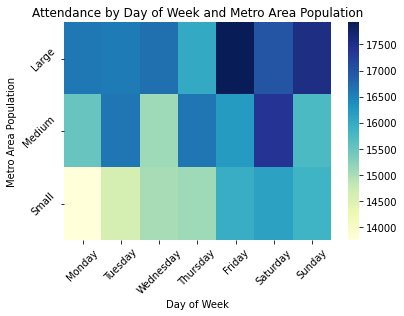

In [51]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot = df.pivot_table(index='Cat3', columns='Day of Week', values='Att.')
pivot = pivot.reindex(columns=days)

sns.heatmap(pivot, cmap='YlGnBu')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.xlabel('Day of Week')
plt.ylabel('Metro Area Population')
plt.title('Attendance by Day of Week and Metro Area Population')

plt.show()

In [52]:
from scipy.stats import ttest_ind

grouped_data = df.groupby(['Cat3'])['Att.']

t_test_results = {}

for group, data in grouped_data:
    if len(data)>1:
        t_stat, p_value = ttest_ind(data, df['Att.'])
        t_test_results[group] = (t_stat, p_value)
    else:
        t_test_results[group] = 'Not Enough Data'

print(t_test_results)

{'Large': (3.851171536993308, 0.00012222787328727188), 'Medium': (2.004615553889384, 0.04516601356170073), 'Small': (-3.435148705239971, 0.0006046163417271246)}


This heat map illustrates the differences in attendance between games that take place is small, medium and large metro populations and days of the week. This map displays how important it is to pay close attention to scheduling. In the smaller markets, it would be beneficial to play as many weekends as possible. Whereas the difference in day of the week in larger markets has less of an impact. This makes sense for the larger cities such as New York becuase the floor attendance is so much higher than a place like Raliegh. There is a clear statiscally significance to the difference between Large and Small metro areas with great differences in the mean. 